# **Transformers and Attention Mechanisms**

---

## **1. Introduction**

### **What are Transformers?**
Transformers are neural network architectures introduced in the paper ["Attention Is All You Need"](https://arxiv.org/abs/1706.03762). They rely entirely on **self-attention mechanisms** to process sequential data, eliminating the need for recurrent or convolutional layers. Transformers excel in tasks like translation, text generation, and summarization.

### **Key Innovations**
1. **Self-Attention**: Captures relationships between words in a sequence.
2. **Scaled Dot-Product Attention**: Efficiently computes attention weights.
3. **Multi-Head Attention**: Parallelizes attention mechanisms for richer context.

### **Objective**
To implement a Transformer model using Hugging Face's `transformers` library for **text classification** and understand the role of attention in NLP tasks.

---

## **2. Metadata and Dataset Overview**

### **Dataset Used**
- **Dataset Name**: IMDB Movie Reviews
- **Source**: [Hugging Face Datasets](https://huggingface.co/datasets/imdb)
- **Description**: 50,000 movie reviews labeled as positive (1) or negative (0).

### **Acknowledgement**
This dataset is publicly available via Hugging Face and is widely used for sentiment analysis.

---

## **3. Setup and Data Preprocessing**

### **Install Dependencies**


In [1]:
!pip install transformers datasets torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 22.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 36.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 65.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

### **Explanation**
- We install the necessary libraries:
  - `transformers`: Hugging Face's library for pre-trained models.
  - `datasets`: Library for loading and processing datasets.
  - `torch`: PyTorch for deep learning.


### **Load Dataset**

In [2]:
from datasets import load_dataset

# Load IMDB dataset
dataset = load_dataset("imdb")
print(dataset["train"][0])  # Sample review


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/7.81k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/21.0M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/20.5M [00:00<?, ?B/s]

unsupervised-00000-of-00001.parquet:   0%|          | 0.00/42.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

{'text': 'I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus her attentions to making some sort of documentary on what the average Swede thought about certain political issues such as the Vietnam War and race issues in the United States. In between asking politicians and ordinary denizens of Stockholm about their opinions on politics, she has sex with her drama teacher, classmates, and married men.<br /><br />What kills me about I AM CURIOUS-YELLOW is that 40 years ago, this was considered pornographic. Really, the sex and nudity scenes are few and far be

### **Explanation**
- The `load_dataset` function loads the IMDB dataset, which contains 50,000 movie reviews labeled as positive (1) or negative (0).
- We print the first training example to inspect the data format.



## 1. **Why Transformers?**

### **The Problem with RNNs and LSTMs:**
- **Sequential Processing:** RNNs, LSTMs, and GRUs process data one step at a time. This makes them slow for long sequences.
- **Long-Range Dependencies:** Even though LSTMs and GRUs improve upon vanilla RNNs, they can still struggle with very long-range relationships.
- **Parallelization Limits:** Because each token’s processing depends on the previous one, you can’t fully parallelize the computations over the entire sequence.

### **The Transformer Advantage:**
- **Parallel Processing:** Transformers handle entire sequences at once, speeding up training.
- **Better Long-Range Dependency Handling:** They use a mechanism called **self-attention** to directly model the relationships between all tokens, no matter how far apart they are.
- **Scalability:** These advantages make transformers suitable for very large datasets and complex tasks like machine translation, language modeling, and more.

---

## 2. **High-Level Architecture: Encoder and Decoder**

The Transformer is divided into two main parts:

### **Encoder:**
- **Purpose:** Processes the input sequence and produces a rich representation (a set of vectors) for each input token.
- **Structure:** It consists of multiple identical layers, each containing:
  - **Multi-Head Self-Attention:** Allows the model to focus on different parts of the input simultaneously.
  - **Feed-Forward Neural Network:** Applies non-linear transformations to each token independently.
  - **Residual Connections & Layer Normalization:** These help stabilize and speed up training by allowing gradients to flow more easily.

### **Decoder:**
- **Purpose:** Uses the encoder’s output along with the previously generated tokens to produce the next token in the output sequence.
- **Structure:** Similar to the encoder, but with an extra layer for:
  - **Masked Self-Attention:** Ensures the model only “sees” past tokens (important for generating text in a sequence).
  - **Encoder-Decoder Attention:** This layer helps the decoder focus on the relevant parts of the encoder’s output.
- Like the encoder, the decoder also has feed-forward layers, residual connections, and layer normalization.

---

## 3. **The Core: Self-Attention Mechanism**

### **Basic Idea:**
Self-attention is the mechanism by which a token in a sequence looks at other tokens to gather context. Instead of processing sequentially, every token can “attend” to every other token at once.

### **Key Components: Query, Key, and Value**
- **Query (Q):** Represents the token seeking information.
- **Key (K):** Represents the tokens providing information.
- **Value (V):** Contains the actual information/content to be shared.
  
Imagine each token creates a “question” (query) about what context it needs, “labels” (keys) for itself, and an “answer” (value) that will be used if another token’s query finds it relevant.

### **How It Works:**
1. **Dot-Product Attention:**
   - For each token, compute a score by taking the dot product of its query with every other token’s key.
   - These scores determine how much attention should be given to each token.
2. **Scaling:**
   - The dot products are scaled (dividing by the square root of the dimension of the keys) to prevent extremely large values that could push softmax into regions with very small gradients.
3. **Softmax:**
   - A softmax function is applied to these scores to convert them into probabilities (attention weights) that sum to 1.
4. **Weighted Sum:**
   - Multiply the values (V) by these weights and sum them up to get the output for the token.

Mathematically, it looks like:
\[
\text{Attention}(Q, K, V) = \text{softmax}\left(\frac{QK^T}{\sqrt{d_k}}\right)V
\]
where \(d_k\) is the dimension of the keys.

### **Multi-Head Attention:**
- **Why Multiple Heads?**
  - Instead of having one attention mechanism, the model uses several (say 8 or 16) attention “heads” in parallel. Each head learns to focus on different types of relationships or parts of the sequence.
- **How It Works:**
  - The input is projected into different subspaces to produce multiple sets of queries, keys, and values.
  - Each head performs its own attention computation.
  - The outputs of all heads are concatenated and then linearly transformed to form the final output.

---

## 4. **Positional Encoding**

Since the Transformer doesn’t process tokens in order (like RNNs), it needs some way to know the position of each token in the sequence.

- **What Is It?**
  - Positional encoding adds information about the position of each token to its embedding.
- **How It Works:**
  - Typically, fixed sinusoidal functions (sine and cosine waves) are used. The idea is to generate a unique pattern for each position that the model can learn to interpret.
- **Formula Example:**
  - For a position \( pos \) and dimension \( i \):
    \[
    \text{PE}(pos, 2i) = \sin\left(\frac{pos}{10000^{\frac{2i}{d_{\text{model}}}}}\right)
    \]
    \[
    \text{PE}(pos, 2i+1) = \cos\left(\frac{pos}{10000^{\frac{2i}{d_{\text{model}}}}}\right)
    \]
- **Result:**
  - These encodings are added to the token embeddings so that the model knows, for example, that “dog” is the first word and “barked” is the third word, even though the attention mechanism itself is order-agnostic.

---

## 5. **Feed-Forward Neural Networks and Residual Connections**

### **Feed-Forward Layers:**
- **Purpose:** After self-attention, each token’s representation is passed through a small fully connected neural network (often the same network applied to each token independently).
- **Why?** This network helps the model learn complex transformations on each token’s representation.

### **Residual Connections and Layer Normalization:**
- **Residual (Skip) Connections:** Add the input of a layer to its output. This helps in avoiding the vanishing gradient problem and allows the network to learn modifications rather than entirely new representations.
- **Layer Normalization:** Stabilizes the network’s training by normalizing the inputs across the features, which helps in faster and more stable convergence.

---

## 6. **Putting It All Together: The Flow of Data**

1. **Input Tokenization:**
   - Convert the text into tokens (words or subwords).
   - Each token is turned into an embedding (a vector representation).

2. **Add Positional Encoding:**
   - Add positional encodings to these embeddings so that the model can distinguish positions.

3. **Pass Through Encoder:**
   - **Multiple Encoder Layers:** Each layer performs multi-head self-attention, followed by a feed-forward network, with residual connections and layer normalization at each step.
   - **Result:** A set of context-rich vectors that represent the input sequence.

4. **Decoder Process (for tasks like translation or text generation):**
   - **Masked Self-Attention:** The decoder looks at previously generated tokens. The mask ensures that the model doesn’t “cheat” by looking ahead.
   - **Encoder-Decoder Attention:** The decoder attends to the encoder’s output. This helps the decoder know which parts of the input are relevant for generating the next token.
   - **Feed-Forward Network and Residuals:** Similar to the encoder, to refine the output.
   - **Output:** Finally, a linear layer followed by softmax is applied to produce a probability distribution over the vocabulary for the next token.

5. **Training:**
   - **Loss Function:** Typically, a cross-entropy loss is used to measure how far off the predicted token distribution is from the actual token.
   - **Optimization:** The entire network (both encoder and decoder) is trained end-to-end using backpropagation.

---

## 7. **Why It Works So Well**

- **Parallelization:** Because all tokens are processed simultaneously, training can be done much faster than sequential models.
- **Flexibility with Attention:** The self-attention mechanism allows the model to directly model interactions between any two tokens, which is crucial for understanding context, regardless of distance.
- **Scalability:** Transformers have become the backbone of many state-of-the-art models (like BERT, GPT, and others) because they scale well with data and computational power.

---

## 8. **Applications Beyond Language**

While the Transformer was originally designed for machine translation, its design has inspired many adaptations:
- **BERT:** Uses a transformer encoder for bidirectional understanding of language.
- **GPT Series:** Uses a transformer decoder (or a modified version) for generating text.
- **Vision Transformers (ViT):** Adapts the transformer architecture to image data by breaking images into patches.
- **Other Domains:** Audio, reinforcement learning, and even graph data have seen transformer adaptations.

---

## **In Summary**

- **Transformers** use an encoder-decoder architecture with self-attention mechanisms, which let every token in a sequence interact with every other token.
- **Self-Attention** (with queries, keys, and values) is the core idea that allows the model to understand context across the whole sequence.
- **Multi-Head Attention** enriches this by letting the model learn different types of relationships in parallel.
- **Positional Encodings** give the model a sense of order.
- **Feed-Forward Layers, Residual Connections, and Layer Normalization** ensure the model can learn complex patterns efficiently.
- **Overall**, transformers enable parallel processing and better long-range dependency handling, making them highly effective for a wide range of tasks.

This step-by-step breakdown covers the “from start to finish” explanation of transformers in a simpler way. Once you understand these building blocks, you can dive deeper into each component (like exploring different types of attention, variants of positional encoding, or even improvements in recent transformer architectures). Happy learning!

### **Tokenization**

In [3]:

from transformers import AutoTokenizer

# Load DistilBERT tokenizer
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

# Tokenize a sample review
sample_text = dataset["train"][0]["text"]
tokenized_input = tokenizer(
    sample_text,
    padding="max_length",
    truncation=True,
    max_length=128,  # Reduced sequence length for faster training
    return_tensors="pt"
)
print(tokenized_input)


The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

{'input_ids': tensor([[  101,  1045, 12524,  1045,  2572,  8025,  1011,  3756,  2013,  2026,
          2678,  3573,  2138,  1997,  2035,  1996,  6704,  2008,  5129,  2009,
          2043,  2009,  2001,  2034,  2207,  1999,  3476,  1012,  1045,  2036,
          2657,  2008,  2012,  2034,  2009,  2001,  8243,  2011,  1057,  1012,
          1055,  1012,  8205,  2065,  2009,  2412,  2699,  2000,  4607,  2023,
          2406,  1010,  3568,  2108,  1037,  5470,  1997,  3152,  2641,  1000,
          6801,  1000,  1045,  2428,  2018,  2000,  2156,  2023,  2005,  2870,
          1012,  1026,  7987,  1013,  1028,  1026,  7987,  1013,  1028,  1996,
          5436,  2003,  8857,  2105,  1037,  2402,  4467,  3689,  3076,  2315,
         14229,  2040,  4122,  2000,  4553,  2673,  2016,  2064,  2055,  2166,
          1012,  1999,  3327,  2016,  4122,  2000,  3579,  2014,  3086,  2015,
          2000,  2437,  2070,  4066,  1997,  4516,  2006,  2054,  1996,  2779,
         25430, 14728,  2245,  2055,  

### **Explanation**
- We load the DistilBERT tokenizer using `AutoTokenizer`.
- The tokenizer converts text into input IDs, attention masks, and token type IDs.
- `padding="max_length"` ensures all sequences are padded to 128 tokens (reduced from 512 for faster training).
- `truncation=True` truncates sequences longer than 128 tokens.
- `return_tensors="pt"` returns PyTorch tensors.


## **4. Build a Transformer Model**

### **Code: Load Pre-Trained DistilBERT**

In [4]:
from transformers import AutoModelForSequenceClassification

# Load pre-trained DistilBERT with a classification head
model = AutoModelForSequenceClassification.from_pretrained(
    "distilbert-base-uncased",
    num_labels=2  # Binary classification (positive/negative)
)


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


### **Explanation**
- We load a pre-trained DistilBERT model with a classification head using `AutoModelForSequenceClassification`.
- `num_labels=2` specifies that this is a binary classification task (positive/negative).
- DistilBERT is smaller and faster than BERT, making it suitable for local execution.


### **Code: Training Configuration**

In [5]:
from transformers import TrainingArguments, Trainer

# Training arguments
training_args = TrainingArguments(
    output_dir="./results",
    num_train_epochs=1,  # Reduced epochs for faster training
    per_device_train_batch_size=16,  # Increased batch size for faster training
    per_device_eval_batch_size=16,
    logging_dir="./logs",
    logging_steps=10,  # Log every 10 steps
)


### **Explanation**
- We define training arguments using `TrainingArguments`:
  - `output_dir`: Directory to save model checkpoints.
  - `num_train_epochs`: Number of training epochs (reduced to 1 for faster execution).
  - `per_device_train_batch_size`: Batch size for training (increased to 16).
  - `per_device_eval_batch_size`: Batch size for evaluation.
  - `logging_dir`: Directory to save logs.
  - `logging_steps`: Log metrics every 10 steps.


## **5. Training the Model**

### **Code: Preprocess the Dataset**

In [6]:
# Tokenize the entire dataset
def tokenize_function(examples):
    return tokenizer(
        examples["text"],
        padding="max_length",
        truncation=True,
        max_length=128  # Reduced sequence length for faster training
    )

# Use a smaller subset of the dataset for faster training
small_train_dataset = dataset["train"].shuffle(seed=42).select(range(1000))  # 1000 samples
small_test_dataset = dataset["test"].shuffle(seed=42).select(range(1000))  # 1000 samples

tokenized_train_dataset = small_train_dataset.map(tokenize_function, batched=True)
tokenized_test_dataset = small_test_dataset.map(tokenize_function, batched=True)


Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

### **Explanation**
- We define a `tokenize_function` to tokenize the entire dataset.
- We use a smaller subset of the dataset (1000 samples) for faster training.
- The `map` function applies this tokenization to all examples in the dataset.


### **Code: Train**

In [7]:
# Initialize Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train_dataset,
    eval_dataset=tokenized_test_dataset,
)

# Train the model
trainer.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: sayande01 (sayande01-capgemini) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


Step,Training Loss
10,0.694500
20,0.684900
30,0.687900
40,0.639100
50,0.511500
60,0.444800


TrainOutput(global_step=63, training_loss=0.6056460804409451, metrics={'train_runtime': 96.3605, 'train_samples_per_second': 10.378, 'train_steps_per_second': 0.654, 'total_flos': 33116849664000.0, 'train_loss': 0.6056460804409451, 'epoch': 1.0})

### **Explanation**
- We initialize a `Trainer` object with the model, training arguments, and datasets.
- The `train` method starts the training process.


## **6. Inference and Attention Visualization**

### **Code: Predict Sentiment**


In [12]:
import torch

# Sample inference
sample_review = "This movie was a masterpiece! The acting was phenomenal."
sample_review_2 = "I wasted 3 hours of my time, the film was absolutely boring."
inputs = tokenizer(sample_review_2, return_tensors="pt", padding=True, truncation=True)

# Move inputs to the same device as the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  # Get device (GPU if available)
inputs = {k: v.to(device) for k, v in inputs.items()}  # Move tensors to device
model.to(device)  # If model is not already on the device



outputs = model(**inputs)

# Move logits to CPU before applying softmax
predictions = torch.softmax(outputs.logits.cpu(), dim=1)

print(f"Positive: {predictions[0][1]:.2f}, Negative: {predictions[0][0]:.2f}")

Positive: 0.16, Negative: 0.84


### **Explanation**

1. **Import and Define the Sample Review:**
   - We import PyTorch (`import torch`) and define a sample movie review string (`sample_review`) that will be used for inference.

2. **Tokenization:**
   - The `tokenizer` converts the raw text into tokenized inputs that the model can understand. We specify `return_tensors="pt"` to get PyTorch tensors, use `padding=True` to pad the sequences to the same length, and `truncation=True` to shorten overly long inputs.

3. **Device Setup:**
   - The code checks for a GPU using `torch.cuda.is_available()`. If available, it sets the device to GPU (`cuda`), otherwise it defaults to CPU. This ensures that we use hardware acceleration if possible.

4. **Moving Data and Model to the Device:**
   - The tokenized inputs (a dictionary of tensors) are moved to the chosen device using a dictionary comprehension.
   - The model is also moved to the same device to ensure that both data and model are on the same hardware, which is necessary for performing computations.

5. **Model Inference:**
   - The model is called with the tokenized inputs (`model(**inputs)`). The `**inputs` syntax unpacks the dictionary so that each key-value pair is passed as a keyword argument. The model returns outputs that include logits (raw class scores).

6. **Processing the Outputs:**
   - The raw logits are first moved to the CPU using `.cpu()`, then the softmax function is applied to convert them into probabilities across classes (with `dim=1` specifying that softmax is computed along the class dimension).

7. **Printing the Predictions:**
   - Finally, the code prints the probabilities for the positive and negative sentiments. `predictions[0][1]` accesses the probability for the positive class, and `predictions[0][0]` for the negative class, each formatted to two decimal places.



Device set to use cuda:0
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/text_classification.py:106: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
DistilBertSdpaAttention is used but `torch.nn.functional.scaled_dot_product_attention` does not support `output_attentions=True` or `head_mask`. Falling back to the manual attention implementation, but specifying the manual implementation will be required from Transformers version v5.0.0 onwards. This warning can be removed

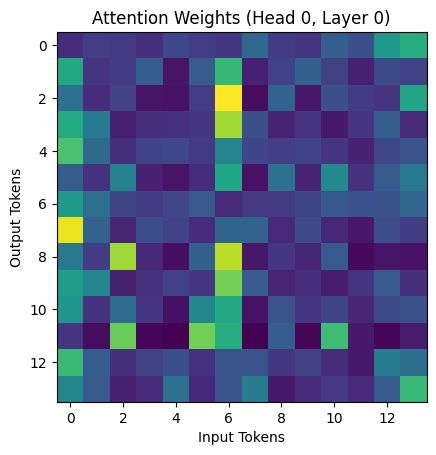

In [13]:
from transformers import pipeline

# Load a pipeline for visualization
attn_pipeline = pipeline("text-classification", model=model, tokenizer=tokenizer, return_all_scores=True)

# Get attention weights (requires custom implementation)
# Note: Hugging Face's pipeline doesn't directly expose attention weights.
# Use a model that supports attention output (e.g., `distilbert-base-uncased` with `output_attentions=True`).
model = AutoModelForSequenceClassification.from_pretrained(
    "distilbert-base-uncased",
    output_attentions=True  # Enable attention output
)

inputs = tokenizer(sample_review, return_tensors="pt", padding=True, truncation=True)
outputs = model(**inputs)
attentions = outputs.attentions  # List of attention tensors (6 layers for DistilBERT)

# Plot attention for the first layer
import matplotlib.pyplot as plt

layer = 0
attention_matrix = attentions[layer][0].detach().numpy()  # Shape: (num_heads, seq_len, seq_len)

plt.imshow(attention_matrix[0], cmap="viridis")
plt.xlabel("Input Tokens")
plt.ylabel("Output Tokens")
plt.title("Attention Weights (Head 0, Layer 0)")
plt.show()

### **Explanation**
- We load a pipeline for text classification and visualize attention weights.
- Attention weights are extracted from the model and plotted as a heatmap.


## **7. Advantages and Disadvantages**

### **Advantages**
1. **Parallelization**: Transformers process entire sequences at once (unlike RNNs).
2. **Context Awareness**: Self-attention captures long-range dependencies.
3. **State-of-the-Art Performance**: Dominates NLP benchmarks.

### **Disadvantages**
1. **Compute-Intensive**: Requires GPUs/TPUs for training.
2. **Memory Usage**: Attention matrices scale quadratically with sequence length.
3. **Data Hunger**: Needs large datasets for fine-tuning.

---

## **8. Conclusion**

### **Key Learnings**
- Transformers replace recurrence with self-attention for efficient sequence processing.
- Hugging Face's `transformers` library simplifies implementation of state-of-the-art models.
- Attention visualization helps interpret model decisions.

### **Next Steps**
1. **Experiment with Larger Models**: Try `bert-large` or `roberta`.
2. **Fine-Tune for Other Tasks**: Explore translation, summarization, or QA.
3. **Optimize for Deployment**: Use ONNX or TensorRT for production.

---

## **9. References**
- [Attention Is All You Need (Paper)](https://arxiv.org/abs/1706.03762)
- [Hugging Face Transformers Documentation](https://huggingface.co/docs/transformers/index)
- [IMDB Dataset](https://huggingface.co/datasets/imdb)
